<a href="https://colab.research.google.com/github/pyojung/AIpython/blob/main/240524.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
datair = sns.load_dataset('iris')
irisdf = pd.DataFrame(datair)

irisdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
irisdf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
species_counts = irisdf['species'].value_counts()
species_counts

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [23]:
irisdf.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [27]:
irisdf[irisdf.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [44]:
idx = (irisdf['sepal_length'] == 5.8) & (irisdf['petal_width']==1.9)
irisdf.loc[idx,:]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [26]:
irisdf2 = irisdf.drop_duplicates()

In [29]:
species_sum = irisdf2.groupby('species').sum()
species_sum

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [30]:
species_mean = irisdf2.groupby('species').mean()
species_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


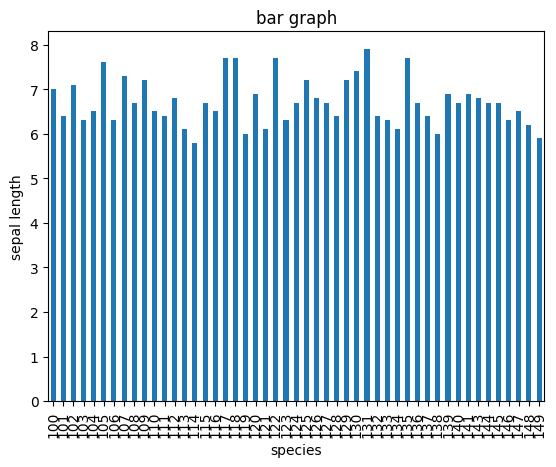

In [34]:
sepal_length = irisdf2.groupby('species')['sepal_length']
sepal_length.plot(kind='bar')

plt.title('bar graph')
plt.xlabel('species')
plt.ylabel('sepal length')

# 그래프 보여주기
plt.show()

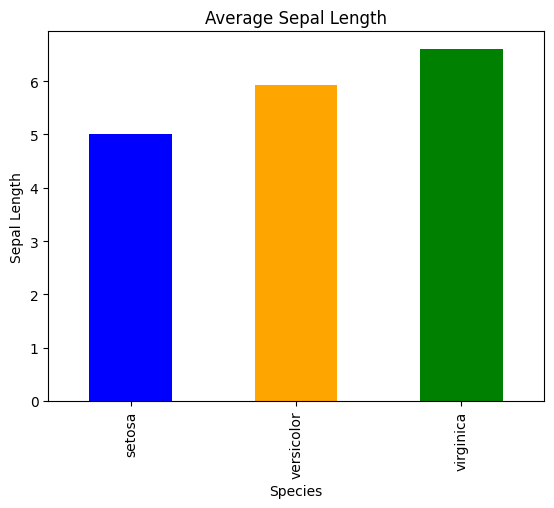

In [35]:
sepal_length_mean = irisdf2.groupby('species')['sepal_length'].mean()

sepal_length_mean.plot(kind='bar', color=['blue', 'orange', 'green'])

plt.title('Average Sepal Length')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

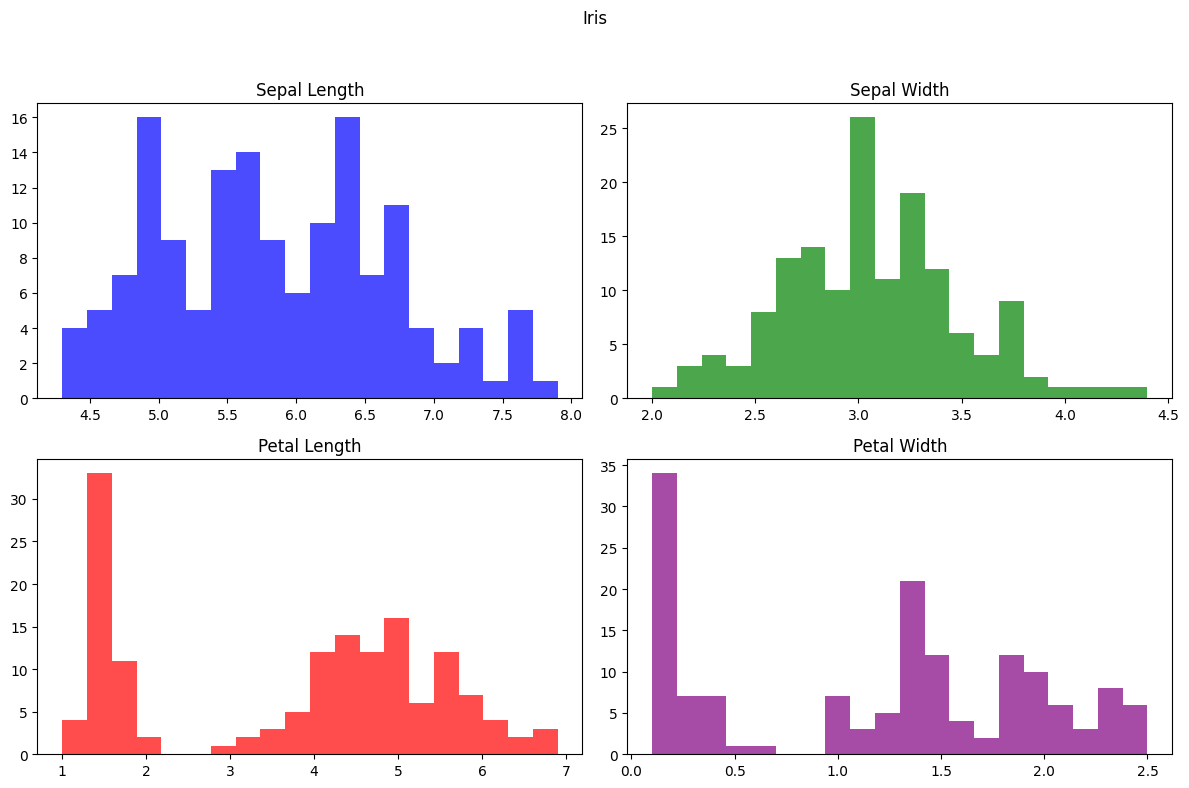

In [38]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].hist(irisdf2['sepal_length'], bins=20, color='blue', alpha=0.7)
axs[0, 0].set_title('Sepal Length')

axs[0, 1].hist(irisdf2['sepal_width'], bins=20, color='green', alpha=0.7)
axs[0, 1].set_title('Sepal Width')

axs[1, 0].hist(irisdf2['petal_length'], bins=20, color='red', alpha=0.7)
axs[1, 0].set_title('Petal Length')

axs[1, 1].hist(irisdf2['petal_width'], bins=20, color='purple', alpha=0.7)
axs[1, 1].set_title('Petal Width')
fig.suptitle('Iris')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [39]:
irisdf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


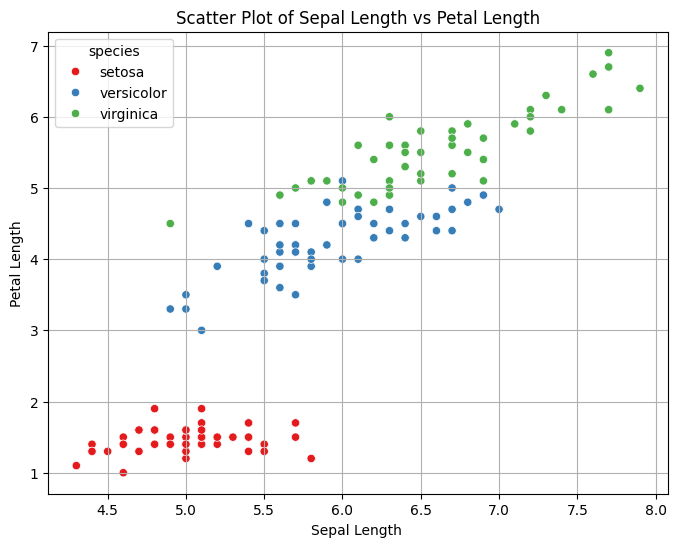

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='petal_length', data=irisdf2, hue='species', palette='Set1')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length ')
plt.ylabel('Petal Length')
plt.grid(True)
plt.show()